## 0. Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Data

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/test.csv')
print(train.shape,test.shape)

(7352, 563) (2947, 563)


In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
sv = SVC()
sv

SVC()

In [7]:
from sklearn.preprocessing import LabelEncoder

X_train = train.iloc[:,:-2]
Y_train = train['Activity']
le = LabelEncoder()
le.fit(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'] )
Y_train_encoded = le.transform(Y_train)

In [8]:
X_test = test.iloc[:,:-2]
Y_test = test['Activity']
Y_test_encoded = le.transform(Y_test)

## 2. Training model using all features

In [9]:
sv.fit(X_train,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test))))

SVM Train Accuracy : 0.9790533188248096
SVM Test Accuracy : 0.9504580929759077


## 3. Choosing the kernel

In [10]:
test_scores = []
for i in ['rbf','linear','poly','sigmoid']:
    sv = SVC(kernel=i)
    sv.fit(X_train,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,sv.predict(X_test))
    test_scores.append(acc)
    print("{} : {}".format(i,acc))

rbf : 0.9504580929759077
linear : 0.9640312181879878
poly : 0.9579233118425518
sigmoid : 0.8608754665761792


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


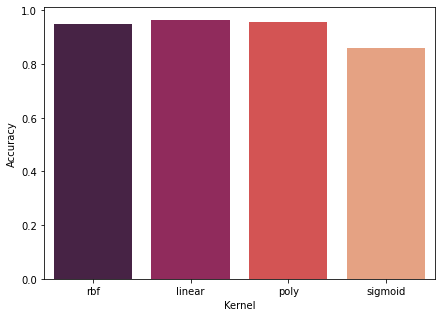

In [11]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
sns.barplot(['rbf','linear','poly','sigmoid'],test_scores,palette="rocket")

## 4. Training with 'linear' kernel

In [12]:
sv = SVC(kernel='linear')
sv.fit(X_train,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test))))

SVM Train Accuracy : 0.9938792165397171
SVM Test Accuracy : 0.9640312181879878


## 5. Choosing the value of regularization parameter, C

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.

In [13]:
test_scores = []
for i in [0.001,0.01,0.1,1,10,100,1000]:
    sv = SVC(kernel='linear',C=i)
    sv.fit(X_train,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,sv.predict(X_test))
    test_scores.append(acc)
    print("{} : {}".format(i,acc))

0.001 : 0.9100780454699695
0.01 : 0.9504580929759077
0.1 : 0.9606379368849678
1 : 0.9640312181879878
10 : 0.9630132337970818
100 : 0.9619952494061758
1000 : 0.9613165931455717


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


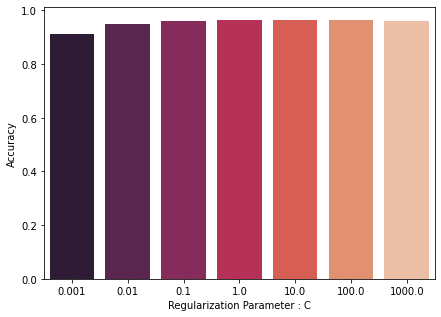

In [14]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.xlabel('Regularization Parameter : C')
plt.ylabel('Accuracy')
sns.barplot([0.001,0.01,0.1,1,10,100,1000],test_scores,palette="rocket")

## 6. PCA


In [15]:
from sklearn.decomposition import PCA
X_train = train.iloc[:,:-2]
X_test = test.iloc[:,:-2]
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape,X_train_pca.shape)
print(X_test.shape,X_test_pca.shape)

(7352, 561) (7352, 10)
(2947, 561) (2947, 10)


In [16]:
sv = SVC(kernel='linear',C=1.0)
sv.fit(X_train_pca,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train_pca))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test_pca))))

SVM Train Accuracy : 0.9023394994559304
SVM Test Accuracy : 0.8788598574821853


## 7. Selecting the number of components

In [17]:
r = range(10,251,10)
pca_scores = []
for i in r:
    pca = PCA(n_components=i,random_state=0).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    sv = SVC(kernel='linear',C=1.0).fit(X_train_pca,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,sv.predict(X_test_pca))
    pca_scores.append(acc)
    print("{} : {}".format(i,acc))

10 : 0.8788598574821853
20 : 0.8751272480488632
30 : 0.8934509670851714
40 : 0.9182219205972175
50 : 0.9192399049881235
60 : 0.9399389209365456
70 : 0.9412962334577536
80 : 0.9362063115032236
90 : 0.9433322022395657
100 : 0.9402782490668476
110 : 0.9487614523243977
120 : 0.9457074991516796
130 : 0.9545300305395318
140 : 0.9541907024092298
150 : 0.9562266711910418
160 : 0.9586019681031558
170 : 0.9606379368849678
180 : 0.9630132337970818
190 : 0.9633525619273838
200 : 0.9623345775364778
210 : 0.9633525619273838
220 : 0.9630132337970818
230 : 0.9626739056667798
240 : 0.9633525619273838
250 : 0.9630132337970818


([<matplotlib.axis.XTick at 0x7f784365b990>,
 <a list of 25 Text major ticklabel objects>)

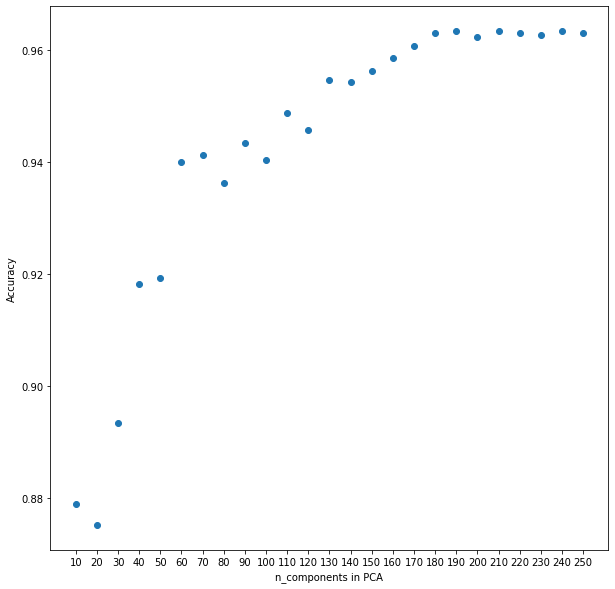

In [18]:
plt.figure(figsize=(10,10))
plt.xlabel('n_components in PCA')
plt.ylabel('Accuracy')
plt.scatter(range(10,260,10),pca_scores)
plt.xticks(range(10,260,10))

## 8. Training model with 190 components

In [19]:
pca = PCA(n_components=190,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
sv = SVC(kernel='linear',C=1.0).fit(X_train_pca,Y_train_encoded)
print ("SVM Train Accuracy : {}".format(accuracy_score(Y_train_encoded,sv.predict(X_train_pca))))
print ("SVM Test Accuracy : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test_pca))))

SVM Train Accuracy : 0.9929270946681176
SVM Test Accuracy : 0.9633525619273838


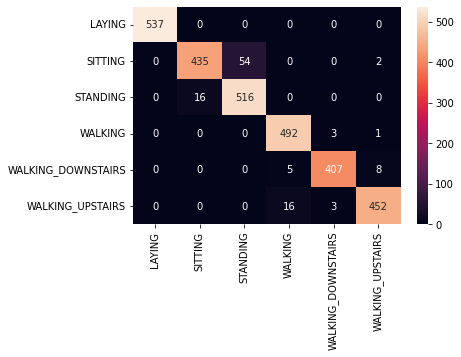

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
sns.heatmap(data=confusion_matrix(Y_test_encoded,sv.predict(X_test_pca)),
            fmt ='.0f',
            annot=True,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))

In [21]:
print ("Accuracy Score : {}".format(accuracy_score(Y_test_encoded,sv.predict(X_test_pca))))
print ("Precision Score: {}".format(precision_score(Y_test_encoded,sv.predict(X_test_pca),average='macro')))
print ("Recall Acore : {}".format(recall_score(Y_test_encoded,sv.predict(X_test_pca),average='macro')))
print ("F1 Score : {}".format(f1_score(Y_test_encoded,sv.predict(X_test_pca),average='macro')))

Accuracy Score : 0.9633525619273838
Precision Score: 0.965094137098033
Recall Acore : 0.962752543171959
F1 Score : 0.9633899938172665


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_encoded,sv.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.89      0.92       491
           2       0.91      0.97      0.94       532
           3       0.96      0.99      0.98       496
           4       0.99      0.97      0.98       420
           5       0.98      0.96      0.97       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

